In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
import os
import pathlib
import re
import collections
import scipy.spatial.distance as ds
import pickle
import numpy as np
import random
import string
from string import digits
import pandas as pd
import unicodedata
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as f
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
!pip install rouge_score
from rouge_score import rouge_scorer

sns.set_style("darkgrid")

import matplotlib.ticker as ticker
from nltk.translate.bleu_score import sentence_bleu
from __future__ import absolute_import, division, print_function
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
print(tf.__version__)
import io
import time
from sklearn.model_selection import train_test_split

2.7.0


In [7]:
# !tar -xvf  "/content/drive/My Drive/Adv_NLP_Project/dakshina_dataset_v1.0.tar" -C "/content/sample_data/" 
# !tar -xvf  "/content/drive/MyDrive/NLP/Project/Dataset/dakshina_dataset_v1.0.tar" -C "/content/sample_data/"
!tar -xvf  "/content/drive/MyDrive/NLP/dakshina_dataset_v1.0.tar" -C "/content/sample_data/"

dakshina_dataset_v1.0/bn/
dakshina_dataset_v1.0/bn/lexicons/
dakshina_dataset_v1.0/bn/lexicons/bn.translit.sampled.test.tsv
dakshina_dataset_v1.0/bn/lexicons/bn.translit.sampled.train.tsv
dakshina_dataset_v1.0/bn/lexicons/bn.translit.sampled.dev.tsv
dakshina_dataset_v1.0/bn/native_script_wikipedia/
dakshina_dataset_v1.0/bn/native_script_wikipedia/bn.wiki-filt.valid.text.shuf.txt.gz
dakshina_dataset_v1.0/bn/native_script_wikipedia/bn.wiki-full.info.sorted.tsv.gz
dakshina_dataset_v1.0/bn/native_script_wikipedia/bn.wiki-filt.train.info.sorted.tsv.gz
dakshina_dataset_v1.0/bn/native_script_wikipedia/bn.wiki-filt.train.text.sorted.tsv.gz
dakshina_dataset_v1.0/bn/native_script_wikipedia/bn.wiki-filt.train.text.shuf.txt.gz
dakshina_dataset_v1.0/bn/native_script_wikipedia/bn.wiki-full.nonblock.sections.tsv.gz
dakshina_dataset_v1.0/bn/native_script_wikipedia/bn.wiki-full.omit_pages.txt.gz
dakshina_dataset_v1.0/bn/native_script_wikipedia/bn.wiki-full.text.sorted.tsv.gz
dakshina_dataset_v1.0/bn/na

In [8]:
l_train = []
l_test = []

f1="/content/sample_data/dakshina_dataset_v1.0/hi/romanized/hi.romanized.rejoined.dev.native.txt"
curr_file1 = open(f1, "r")
for line in curr_file1:
  temp = []
  temp.append(line)
  l_train.append(temp)
curr_file1.close()

f2="/content/sample_data/dakshina_dataset_v1.0/hi/romanized/hi.romanized.rejoined.dev.native.txt"
curr_file2 = open(f2, "r")
i=0
for line in curr_file2:
  l_train[i].append(line)
  i+=1
curr_file2.close()

f3="/content/sample_data/dakshina_dataset_v1.0/hi/romanized/hi.romanized.rejoined.test.native.txt"
curr_file3 = open(f3, "r")
for line in curr_file3:
  temp = []
  temp.append(line)
  l_test.append(temp)
curr_file1.close()

f4="/content/sample_data/dakshina_dataset_v1.0/hi/romanized/hi.romanized.rejoined.test.native.txt"
curr_file4 = open(f4, "r")
i=0
for line in curr_file4:
  l_test[i].append(line)
  i+=1
curr_file2.close()

In [9]:
print(l_train[:10])
print(l_test[:10])

[['इसके आने से पूर्व ही लोग घरों की सफाई का कार्य शुरू कर देते हैं।\n', 'iske aane se purva hi log gharon ki safai ka karya shuru kar dete hain.\n'], ['विलुप्ति की कगार पर गुणकारी तीखुर\n', 'vilupti ki kagaar par gunkaari tikhur\n'], ['माइकल कामेन (द वॉल के वाद्यमय हिस्सों के लिए एक योगदानकर्ता) ने दोनों के बीच मध्यस्थता की और उस भूमिका को निभाया जिस पर पारंपरिक रूप से रिचर्ड राइट ने कब्जा किया हुआ था जो अब अनुपस्थित थे।\n', 'Michael kamen (the wall ke vadyamaya hisso ke liye ek yogdanakarta) ne dono ke bich madhyasthata ki aur us bhumika ko nibhaya jis par paramparik rup se richard wright ne kabja kiya hua tha jo ab anupasthit the.\n'], ['शाहनामा नौरोज़ के त्यौहार को महान जमशेद के शासनकाल से जोड़ता है।\n', 'shahnama noroj ke tyohaar ko mahaan Jamshed ke shashankaal se jodta hai.\n'], ['मेहरोत्रा, डॉ॰ एन.\n', 'Mehrotra, Dr॰ N.\n'], ['दुर्गा भाभी\n', 'durga bhabhi\n'], ['स्वामी बृहस्पति\n', 'swami brhaspati\n'], ['बॉलीवुड, हिन्दी चलचित्र उद्योग भी मुंबई में ही स्थित है।\n', 'bollywood, 

In [10]:
# Create the pandas DataFrame
df = pd.DataFrame(l_train, columns = ['native', 'roman'])
  
# print dataframe.
df

,roman,native
0,इसके आने से पूर्व ही लोग घरों की सफाई का कार्य...,iske aane se purva hi log gharon ki safai ka k...
1,विलुप्ति की कगार पर गुणकारी तीखुर\n,vilupti ki kagaar par gunkaari tikhur\n
2,माइकल कामेन (द वॉल के वाद्यमय हिस्सों के लिए ए...,Michael kamen (the wall ke vadyamaya hisso ke ...
3,शाहनामा नौरोज़ के त्यौहार को महान जमशेद के शास...,shahnama noroj ke tyohaar ko mahaan Jamshed ke...
4,"मेहरोत्रा, डॉ॰ एन.\n","Mehrotra, Dr॰ N.\n"
...,...,...
4995,किन्तु लगता है कि यह मलयालम युक्तिभाषा के बाद ...,kintu lagata hai ki yaha malayalama yuktibhasa...
4996,अक्षांश\n,akshansh\n
4997,"वह लापरवाही से एनामारिया, डेवी जोन्स और अन्य स...","vah laparvahi se enamaria, devi jons aur anya ..."
4998,"""मैं सोचती हूँ कि असली वजह यह थी कि निर्देशक ज...","""main sochti hun ki asli vajah yah thi ki nird..."


In [11]:
letters_native = [chr(letter) for letter in range(2304, 2432)]
alphabet_size_native = len(letters_native)

letter2ind_native = {'<start>': 0,'<end>' : 1}
for index, letter in enumerate(letters_native):
    letter2ind_native[letter] = index+1

print(letter2ind_native)

{'<start>': 0, '<end>': 1, 'ऀ': 1, 'ँ': 2, 'ं': 3, 'ः': 4, 'ऄ': 5, 'अ': 6, 'आ': 7, 'इ': 8, 'ई': 9, 'उ': 10, 'ऊ': 11, 'ऋ': 12, 'ऌ': 13, 'ऍ': 14, 'ऎ': 15, 'ए': 16, 'ऐ': 17, 'ऑ': 18, 'ऒ': 19, 'ओ': 20, 'औ': 21, 'क': 22, 'ख': 23, 'ग': 24, 'घ': 25, 'ङ': 26, 'च': 27, 'छ': 28, 'ज': 29, 'झ': 30, 'ञ': 31, 'ट': 32, 'ठ': 33, 'ड': 34, 'ढ': 35, 'ण': 36, 'त': 37, 'थ': 38, 'द': 39, 'ध': 40, 'न': 41, 'ऩ': 42, 'प': 43, 'फ': 44, 'ब': 45, 'भ': 46, 'म': 47, 'य': 48, 'र': 49, 'ऱ': 50, 'ल': 51, 'ळ': 52, 'ऴ': 53, 'व': 54, 'श': 55, 'ष': 56, 'स': 57, 'ह': 58, 'ऺ': 59, 'ऻ': 60, '़': 61, 'ऽ': 62, 'ा': 63, 'ि': 64, 'ी': 65, 'ु': 66, 'ू': 67, 'ृ': 68, 'ॄ': 69, 'ॅ': 70, 'ॆ': 71, 'े': 72, 'ै': 73, 'ॉ': 74, 'ॊ': 75, 'ो': 76, 'ौ': 77, '्': 78, 'ॎ': 79, 'ॏ': 80, 'ॐ': 81, '॑': 82, '॒': 83, '॓': 84, '॔': 85, 'ॕ': 86, 'ॖ': 87, 'ॗ': 88, 'क़': 89, 'ख़': 90, 'ग़': 91, 'ज़': 92, 'ड़': 93, 'ढ़': 94, 'फ़': 95, 'य़': 96, 'ॠ': 97, 'ॡ': 98, 'ॢ': 99, 'ॣ': 100, '।': 101, '॥': 102, '०': 103, '१': 104, '२': 105, '३': 106, '४': 107, '५': 108, '

In [12]:
def preprocess_sentence_roman(w):
    w = w.lower().strip()
    ww = ''
    # w = (re.sub(r'[-]', ' ', data[i])).lower().strip()
    # w = (re.sub(r'[^\w\s]', '', data[i])).lower().strip()
    ww += ''.join(ch for ch in w if ch not in string.punctuation)
    # Remove all numbers from text
    remove_digits = str.maketrans('', '', digits)
    ww = ww.translate(remove_digits)
    ww = ww.rstrip().strip()
    ww = '@' + ww + '#'
    return ww

def preprocess_sentence_native(w):
    w = w.lower()
    cleaned_line = ''
    cleaned_line += ''.join(ch for ch in w if ch not in string.punctuation)
    # Remove all numbers from text
    remove_digits = str.maketrans('', '', digits)
    cleaned_line = cleaned_line.translate(remove_digits)
    cleaned_line = re.sub("[२३०८१५७९४६।–]", "", cleaned_line)
    cleaned_line = cleaned_line.rstrip().strip()
    cleaned_line = '@' + cleaned_line + '#'
    return cleaned_line

In [13]:
def create_dataset(l):

  native_words, native_sents = [], []
  roman_words, roman_sents = [], []

  for i in range(len(df)):
    l[i][0] = preprocess_sentence_native(l[i][0]) # clean native words.
    wordlist1 = l[i][0].split()

    l[i][1] = preprocess_sentence_roman(l[i][1]) # clean roman sentences.
    wordlist2 = l[i][1].split() # clean roman words.

    if len(wordlist1) != len(wordlist2):
      print('Skipping: ',len(wordlist1),len(wordlist2), l[i][0], ' - ', l[i][1])
      continue

    native_words.extend(wordlist1)
    roman_words.extend(wordlist2)

    native_sents.append(wordlist1)
    roman_sents.append(wordlist2)
    
  return [roman_words, native_words], [roman_sents, native_sents]

In [14]:
train_data, train_sents = create_dataset(l_train)
test_data, test_sents = create_dataset(l_test)

Skipping:  28 27 @तांत्रिक साधक पशु वीर दिव्य भावों के द्वारा महाशक्ति की अर्चना करता हुआ सकल ब्रह्म के शक्तिस्वरूप को अनादि चेतन और आनंदरूप समझकर आत्मविवेक की उपलब्धि करता है#  -  @tantrik sadhak pashu veer divya bhawon ke dwara mahashakti ki archana karata hua sakal bramh ke shaktiswaroop ko chetan aur aanandrup samajkar aatmvivek ki uplabdhi karta hai#
Skipping:  22 21 @अतीत में भौतिक कागज का विनिमय होता था और इसमें एक चॅक के समाशोधन में पांच व्यावसायिक दिन तक लग जाते थे#  -  @ateet men bhautik kagaj ka winimay hota tha aur ismeanek chak ke samashodhan men panch vyavasayik din tak lag jaate the#
Skipping:  16 15 @डॉ॰ वी पी मिरांशी के अनुसार वाकाटक वंश का सर्वश्रेष्ठ राजा विन्ध्यशक्ति का पुत्र प्रवरसेन था#  -  @dr vp  miranshi ke anusar vakatak vansh ka sarvashrestha raja vindhyasakti ka putra pravarasena tha#
Skipping:  16 15 @वही परमात्मा सर्जन की इच्छा से अव्यक्त में प्रविष्ट होकर महत् तत्व की रचना करता है#  -  @vahi parmatma sarjan ki ichcha se avyakt mein pravisht hokar mahattva

In [15]:
train_data[0][:10],train_data[1][:10]

(['@iske', 'aane', 'se', 'purva', 'hi', 'log', 'gharon', 'ki', 'safai', 'ka'],
 ['@इसके', 'आने', 'से', 'पूर्व', 'ही', 'लोग', 'घरों', 'की', 'सफाई', 'का'])

In [16]:
test_data[0][:10],test_data[1][:10]

(['@kumbh',
  'rashi',
  'men',
  'janme',
  'log',
  'sambhavnaon',
  'se',
  'bhari',
  'ek',
  'jagah'],
 ['@कुंभ',
  'राशि',
  'में',
  'जन्मे',
  'लोग',
  'संभावनाओं',
  'से',
  'भरी',
  'एक',
  'जगह'])

In [17]:
len(test_data[0]),len(test_data[1]),len(train_data[0]),len(train_data[1])

(85161, 85161, 86526, 86526)

Combine the test and train data. So that we can split train and test set according to our needs.

In [18]:
train_data[0].extend(test_data[0])
train_data[1].extend(test_data[1])

print(len(train_data[0]),len(train_data[1]))

171687 171687


In [19]:
train_data[0][-1],train_data[1][-1]

('malhotra#', 'मल्होत्रा#')

In [20]:
len(train_data[0]),len(train_data[1])

(171687, 171687)

Vocab class. This class will store word2index and index2word mapping for both language.

In [21]:
class WordIndex():
  def __init__(self, lang):
    self.lang = lang
    self.word2idx = {}
    self.idx2word = {}
    self.vocab = set()
    
    self.create_index()
    
  def create_index(self):
    for phrase in self.lang:
      for l in phrase:
        self.vocab.update(l)
    
    self.vocab = sorted(self.vocab)
    
    self.word2idx['<pad>'] = 0
    for index, word in enumerate(self.vocab):
      self.word2idx[word] = index + 1
    
    for word, index in self.word2idx.items():
      self.idx2word[index] = word

Helper functions to create Lang vocab and tensors from words.

In [22]:
def max_length(tensor):
    return max(len(t) for t in tensor)


def load_dataset(pairs):


    # index language using the class defined above    
    inp_lang = WordIndex(pairs[0])
    targ_lang = WordIndex(pairs[1])
    
    # Vectorize the input and target languages
    
    # English words
    input_tensor = [[inp_lang.word2idx[s] for s in en] for en in pairs[0]]
    
    # hindi words
    target_tensor = [[targ_lang.word2idx[s] for s in hn] for hn in pairs[1]]
    
    # Calculate max_length of input and output tensor
    # Here, we'll set those to the longest sentence in the dataset
    max_length_inp, max_length_tar = max_length(input_tensor), max_length(target_tensor)
    
    # Padding the input and output tensor to the maximum length
    input_tensor = tf.keras.preprocessing.sequence.pad_sequences(input_tensor, 
                                                                 maxlen=max_length_inp,
                                                                 padding='post')
    
    target_tensor = tf.keras.preprocessing.sequence.pad_sequences(target_tensor, 
                                                                  maxlen=max_length_tar, 
                                                                  padding='post')
    
    return input_tensor, target_tensor, inp_lang, targ_lang, max_length_inp, max_length_tar

In [23]:
input_tensor, target_tensor, inp_lang, targ_lang, max_length_inp, max_length_targ = load_dataset(train_data)

Function to convert tensor to word and print.

In [24]:
def convert(lang, tensor):
  for t in tensor:
    if t!=0:
      print ("%d ----> %s" % (t, lang.idx2word[t]))

In [25]:
convert(inp_lang,input_tensor[-1])
convert(targ_lang,target_tensor[-1])

15 ----> m
3 ----> a
14 ----> l
10 ----> h
17 ----> o
22 ----> t
20 ----> r
3 ----> a
1 ----> #
70 ----> म
73 ----> ल
96 ----> ्
80 ----> ह
94 ----> ो
60 ----> त
96 ----> ्
72 ----> र
82 ----> ा
1 ----> #


Train and Test split.

In [26]:
input_tensor = input_tensor[:100000]
target_tensor = target_tensor[:100000]
input_tensor_train, input_tensor_val, target_tensor_train, target_tensor_val = train_test_split(input_tensor, target_tensor, test_size=0.1)

# Show length
len(input_tensor_train), len(target_tensor_train), len(input_tensor_val), len(target_tensor_val)

(90000, 90000, 10000, 10000)

Some hyper-parameters.

In [27]:
BUFFER_SIZE = len(input_tensor_train)
BATCH_SIZE = 128
steps_per_epoch = len(input_tensor_train)//BATCH_SIZE
embedding_dim = 256
units = 1024
vocab_inp_size = len(inp_lang.word2idx)+1
vocab_tar_size = len(targ_lang.word2idx)+1

In [28]:
dataset = tf.data.Dataset.from_tensor_slices((input_tensor_train, target_tensor_train)).shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE, drop_remainder=True)

In [29]:
example_input_batch, example_target_batch = next(iter(dataset))
example_input_batch.shape, example_target_batch.shape

(TensorShape([128, 35]), TensorShape([128, 32]))

Let's build the model.
The encoder : it will consume input and produce a thought vector which will be the input of the decoder after applying attention to it.

In [30]:
class Encoder(tf.keras.Model):
  def __init__(self, vocab_size, embedding_dim, enc_units, batch_sz):
    super(Encoder, self).__init__()
    self.batch_sz = batch_sz
    self.enc_units = enc_units
    self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
    self.gru = tf.keras.layers.GRU(self.enc_units,
                                   return_sequences=True,
                                   return_state=True,
                                   recurrent_initializer='glorot_uniform')

  def call(self, x, hidden):
#     print(type(x))
    x = self.embedding(x)
#     print(x.shape)
    output, state = self.gru(x, initial_state = hidden)
    return output, state

  def initialize_hidden_state(self):
    return tf.zeros((self.batch_sz, self.enc_units))


In [31]:
encoder = Encoder(vocab_inp_size, embedding_dim, units, BATCH_SIZE)

# sample input
sample_hidden = encoder.initialize_hidden_state()
sample_output, sample_hidden = encoder(example_input_batch, sample_hidden)
print ('Encoder output shape: (batch size, sequence length, units) {}'.format(sample_output.shape))
print ('Encoder Hidden state shape: (batch size, units) {}'.format(sample_hidden.shape))

Encoder output shape: (batch size, sequence length, units) (128, 35, 1024)
Encoder Hidden state shape: (batch size, units) (128, 1024)


Attention part : this model will return weights so that we feed them into decoder.


In [32]:
class BahdanauAttention(tf.keras.Model):
  def __init__(self, units):
    super(BahdanauAttention, self).__init__()
    self.W1 = tf.keras.layers.Dense(units)
    self.W2 = tf.keras.layers.Dense(units)
    self.V = tf.keras.layers.Dense(1)

  def call(self, query, values):
    # hidden shape == (batch_size, hidden size)
    # hidden_with_time_axis shape == (batch_size, 1, hidden size)
    # we are doing this to perform addition to calculate the score
    hidden_with_time_axis = tf.expand_dims(query, 1)

    # score shape == (batch_size, max_length, 1)
    # we get 1 at the last axis because we are applying score to self.V
    # the shape of the tensor before applying self.V is (batch_size, max_length, units)
    score = self.V(tf.nn.tanh(
        self.W1(values) + self.W2(hidden_with_time_axis)))

    # attention_weights shape == (batch_size, max_length, 1)
    attention_weights = tf.nn.softmax(score, axis=1)

    # context_vector shape after sum == (batch_size, hidden_size)
    context_vector = attention_weights * values
    context_vector = tf.reduce_sum(context_vector, axis=1)

    return context_vector, attention_weights

In [33]:
attention_layer = BahdanauAttention(10)
attention_result, attention_weights = attention_layer(sample_hidden, sample_output)

print("Attention result shape: (batch size, units) {}".format(attention_result.shape))
print("Attention weights shape: (batch_size, sequence_length, 1) {}".format(attention_weights.shape))

Attention result shape: (batch size, units) (128, 1024)
Attention weights shape: (batch_size, sequence_length, 1) (128, 35, 1)


The decoder : calculates the probablity of next character by taking input the attention weights and encoder input.

In [34]:
class Decoder(tf.keras.Model):
  def __init__(self, vocab_size, embedding_dim, dec_units, batch_sz):
    super(Decoder, self).__init__()
    self.batch_sz = batch_sz
    self.dec_units = dec_units
    self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
    self.gru = tf.keras.layers.GRU(self.dec_units,
                                   return_sequences=True,
                                   return_state=True,
                                   recurrent_initializer='glorot_uniform')
    self.fc = tf.keras.layers.Dense(vocab_size)

    # used for attention
    self.attention = BahdanauAttention(self.dec_units)

  def call(self, x, hidden, enc_output):
    # enc_output shape == (batch_size, max_length, hidden_size)
    context_vector, attention_weights = self.attention(hidden, enc_output)


    # x shape after passing through embedding == (batch_size, 1, embedding_dim)
    x = self.embedding(x)

    # x shape after concatenation == (batch_size, 1, embedding_dim + hidden_size)
    x = tf.concat([tf.expand_dims(context_vector, 1), x], axis=-1)

    # passing the concatenated vector to the GRU
    output, state = self.gru(x)

    # output shape == (batch_size * 1, hidden_size)
    output = tf.reshape(output, (-1, output.shape[2]))

    # output shape == (batch_size, vocab)
    x = self.fc(output)

    return x, state, attention_weights

In [35]:
decoder = Decoder(vocab_tar_size, embedding_dim, units, BATCH_SIZE)

sample_decoder_output, _, _ = decoder(tf.random.uniform((128, 1)),
                                      sample_hidden, sample_output)

print ('Decoder output shape: (batch_size, vocab size) {}'.format(sample_decoder_output.shape))

Decoder output shape: (batch_size, vocab size) (128, 111)


In [36]:
optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')

def loss_function(real, pred):
  mask = tf.math.logical_not(tf.math.equal(real, 0))
  loss_ = loss_object(real, pred)

  mask = tf.cast(mask, dtype=loss_.dtype)
  loss_ *= mask

  return tf.reduce_mean(loss_)

Adding checkpoints to store the model.

In [37]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(optimizer=optimizer,
                                 encoder=encoder,
                                 decoder=decoder)

Training step function.

In [38]:
@tf.function
def train_step(inp, targ, enc_hidden):
  loss = 0

  with tf.GradientTape() as tape:
    enc_output, enc_hidden = encoder(inp, enc_hidden)

    dec_hidden = enc_hidden

    dec_input = tf.expand_dims([targ_lang.word2idx['@']] * BATCH_SIZE, 1)

    # Teacher forcing - feeding the target as the next input
    for t in range(1, targ.shape[1]):
      # passing enc_output to the decoder
      predictions, dec_hidden, _ = decoder(dec_input, dec_hidden, enc_output)

      loss += loss_function(targ[:, t], predictions)

      # using teacher forcing
      dec_input = tf.expand_dims(targ[:, t], 1)

  batch_loss = (loss / int(targ.shape[1]))

  variables = encoder.trainable_variables + decoder.trainable_variables

  gradients = tape.gradient(loss, variables)

  optimizer.apply_gradients(zip(gradients, variables))

  return batch_loss

In [39]:
print(len(dataset.take(steps_per_epoch)))

703


Training loop

In [40]:
EPOCHS = 10
loss_values = []

for epoch in range(EPOCHS):
    start = time.time()

    enc_hidden = encoder.initialize_hidden_state()
    total_loss = 0

    for (batch, (inp, targ)) in enumerate(dataset.take(steps_per_epoch)):
        batch_loss = train_step(inp, targ, enc_hidden)
        total_loss += batch_loss

    if batch % 100 == 0:
        print('Epoch {} Batch {} Loss {:.4f}'.format(epoch + 1,
                                                     batch,
                                                     batch_loss.numpy()))
    # saving (checkpoint) the model every 2 epochs
    if (epoch + 1) % 2 == 0:
        checkpoint.save(file_prefix = checkpoint_prefix)
  
    ep_loss = total_loss / steps_per_epoch
    loss_values.append(ep_loss)

    print('Epoch {} Loss {:.4f}'.format(epoch + 1, ep_loss))
    print('Time taken for 1 epoch {} sec\n'.format(time.time() - start))

Epoch 1 Loss 0.1391
Time taken for 1 epoch 673.3607249259949 sec

Epoch 2 Loss 0.0458
Time taken for 1 epoch 622.4627146720886 sec

Epoch 3 Loss 0.0358
Time taken for 1 epoch 618.4995405673981 sec

Epoch 4 Loss 0.0282
Time taken for 1 epoch 621.2075388431549 sec

Epoch 5 Loss 0.0295
Time taken for 1 epoch 621.9276003837585 sec

Epoch 6 Loss 0.0211
Time taken for 1 epoch 619.9608371257782 sec

Epoch 7 Loss 0.0179
Time taken for 1 epoch 618.409530878067 sec

Epoch 8 Loss 0.0158
Time taken for 1 epoch 622.3090085983276 sec

Epoch 9 Loss 0.0166
Time taken for 1 epoch 605.6216759681702 sec

Epoch 10 Loss 0.0150
Time taken for 1 epoch 607.9602472782135 sec



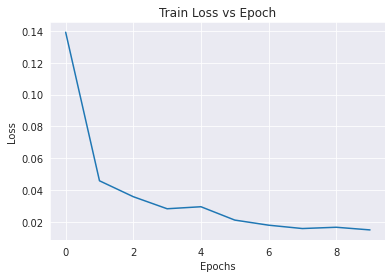

In [41]:
plt.plot(loss_values)
plt.title('Train Loss vs Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [42]:
# !zip -r /content/drive/MyDrive/NLP/Project/outputs/checkpoints_att_eng-hin.zip /content/training_checkpoints
!zip -r /content/drive/MyDrive/NLP/checkpoints_att_eng-hin.zip /content/training_checkpoints

  adding: content/training_checkpoints/ (stored 0%)
  adding: content/training_checkpoints/ckpt-4.data-00000-of-00001 (deflated 22%)
  adding: content/training_checkpoints/ckpt-2.data-00000-of-00001 (deflated 22%)
  adding: content/training_checkpoints/ckpt-1.index (deflated 70%)
  adding: content/training_checkpoints/ckpt-4.index (deflated 70%)
  adding: content/training_checkpoints/ckpt-3.data-00000-of-00001 (deflated 22%)
  adding: content/training_checkpoints/ckpt-2.index (deflated 70%)
  adding: content/training_checkpoints/ckpt-3.index (deflated 70%)
  adding: content/training_checkpoints/ckpt-5.data-00000-of-00001 (deflated 22%)
  adding: content/training_checkpoints/ckpt-5.index (deflated 70%)
  adding: content/training_checkpoints/ckpt-1.data-00000-of-00001 (deflated 22%)
  adding: content/training_checkpoints/checkpoint (deflated 38%)


### Evaluation

In [68]:
def evaluate(sentence):
    attention_plot = np.zeros((max_length_targ, max_length_inp))

    sentence = preprocess_sentence_native(sentence)

    inputs = [inp_lang.word2idx[i] for i in sentence]
#     print(inputs)

    inputs = tf.keras.preprocessing.sequence.pad_sequences([inputs],
                                                           maxlen=max_length_inp,
                                                           padding='post')
#     print(inputs)
    inputs = tf.convert_to_tensor(inputs)

    result = ''

    hidden = [tf.zeros((1, units))]
    enc_out, enc_hidden = encoder(inputs, hidden)

    dec_hidden = enc_hidden
    dec_input = tf.expand_dims([targ_lang.word2idx['@']], 0)

    for t in range(max_length_targ):
        predictions, dec_hidden, attention_weights = decoder(dec_input,
                                                             dec_hidden,
                                                             enc_out)

        # storing the attention weights to plot later on
        attention_weights = tf.reshape(attention_weights, (-1, ))
        attention_plot[t] = attention_weights.numpy()

        predicted_id = tf.argmax(predictions[0]).numpy()

        result += targ_lang.idx2word[predicted_id] + ' '

        if targ_lang.idx2word[predicted_id] == '#':
            return result, sentence, attention_plot

        # the predicted ID is fed back into the model
        dec_input = tf.expand_dims([predicted_id], 0)

    return result, sentence, attention_plot

In [69]:
# function for plotting the attention weights
def plot_attention(attention, sentence, predicted_sentence):
#     print(predicted_sentence)
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(1, 1, 1)
    ax.matshow(attention, cmap='viridis')

    fontdict = {'fontsize': 14}

    ax.set_xticklabels([''] + sentence, fontdict=fontdict, rotation=90)
    ax.set_yticklabels([''] + predicted_sentence, fontdict=fontdict)

    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

    plt.show()

In [70]:
def transliterate(sentence):
    all_words = sentence.split()
    final_result = ""
    for word in all_words:
        result, word, attention_plot = evaluate(word)
        final_result += "".join(result.split(" "))+" "

        # print('Input: %s' % (word))
        # print('Predicted translation: {}\n'.format(''.join(result.split(' '))))


        # result = unicode_to_ascii(result)    
        attention_plot = attention_plot[:len(result.split(' ')), :len(list(word))]
        # plot_attention(attention_plot, list(word), result.split(' '))

    return final_result

In [71]:
def calc_accuracy(test_data, n):
    correct = 0
    for i in range(len(test_data[0][:n])):
        hindi, eng = test_data[0][i], test_data[1][i]

        res, _, _ = evaluate(hindi)
        res = ''.join(res.split(' '))

        eng = eng.replace("@", "")
        eng = eng.replace("#", "")
        res = res.replace("@", "")
        res = res.replace("#", "")

        # print(eng, res)
        if eng == res:
            # print("Yes\n")
            correct += 1

    # accuracy = correct / len(test_data[0])
    accuracy = correct / n
    return accuracy

In [141]:
from nltk.translate.bleu_score import SmoothingFunction

def calc_bleu(test_sens, n):
    bleu_score = 0
    for i in range(len(test_sens[0][:n])):
        inp_sent, trg_sent = test_sens[0][i], test_sens[1][i]

        res = ""
        for i in inp_sent:
            res += i+" "
        res = transliterate(res)

        tmp = ""
        for i in trg_sent:
            tmp += i+" "
        trg_sent = tmp
        trg_sent = trg_sent.replace("@", "")
        trg_sent = trg_sent.replace("#", "")
        res = res.replace("@", "")
        res = res.replace("#", "")

        reference = [trg_sent.split()]
        candidate = res.split()

        smoothie = SmoothingFunction().method4
        bleu_score += sentence_bleu(reference, candidate, smoothing_function=smoothie)

    return bleu_score / n

In [144]:
def calc_rouge(test_sents, n):
    precision, recall, f1score = 0, 0, 0
    scorer = rouge_scorer.RougeScorer(['rouge1'], use_stemmer=True)
    
    for i in range(len(test_sents[0][:n])):
        inp_sent, reference = test_sents[0][i], test_sents[1][i]

        res = ""
        for i in inp_sent:
            res += i+" "
        res = transliterate(res)

        tmp = ""
        for i in reference:
            tmp += i+" "
        reference = tmp
        candidate = res.replace("@", "")
        candidate = res.replace("#", "")
        reference = reference.replace("@", "")
        reference = reference.replace("#", "")
        
        tmp_p, tmp_r, tmp_f = scorer.score(reference, candidate)['rouge1']
        precision += tmp_p
        recall += tmp_r
        f1score += tmp_f

    precision /= n
    recall /= n
    f1score /= n
    
    return (precision, recall, f1score)

In [107]:
print("Results on test data!!")

acc = calc_accuracy(test_data, 10)
print("Accuracy on 10 test words:", acc, "\n")

acc = calc_accuracy(test_data, 100)
print("Accuracy on 100 test words:", acc, "\n")

acc = calc_accuracy(test_data, 500)
print("Accuracy on 500 test words:", acc, "\n")

acc = calc_accuracy(test_data, 1000)
print("Accuracy on 1000 test words:", acc, "\n")

acc = calc_accuracy(test_data, 5000)
print("Accuracy on 5000 test words:", acc, "\n")

Results on test data!!
Accuracy on 10 test words: 0.8 

Accuracy on 100 test words: 0.88 

Accuracy on 500 test words: 0.788 

Accuracy on 1000 test words: 0.774 

Accuracy on 5000 test words: 0.7384 



In [146]:
bleu = calc_bleu(test_sents, 10)
print("Bleu score on 1000 test words:", bleu, "\n")

# rouge = calc_rouge(test_sents, 10)
# print("Rouge score on 1000 test words:", rouge, "\n")

Bleu score on 1000 test words: 0.6337390510214915 



### Testing on various input words


In [108]:
inp_str = "how"
out_str = transliterate(inp_str)
print("Input: ", inp_str)
print("Output: ", out_str)

Input:  how
Output:  हॉव# 


In [109]:
inp_str = "market"
out_str = transliterate(inp_str)
print("Input: ", inp_str)
print("Output: ", out_str)

Input:  market
Output:  मरकेट# 


In [110]:
inp_str = "what"
out_str = transliterate(inp_str)
print("Input: ", inp_str)
print("Output: ", out_str)

Input:  what
Output:  भाट# 


In [111]:
inp_str = "stupid"
out_str = transliterate(inp_str)
print("Input: ", inp_str)
print("Output: ", out_str)

Input:  stupid
Output:  स्टूपाइड़# 


In [112]:
inp_str = "kumbh"
out_str = transliterate(inp_str)
print("Input: ", inp_str)
print("Output: ", out_str)

Input:  kumbh
Output:  कुंभ# 


In [113]:
inp_str = "raasi"
out_str = transliterate(inp_str)
print("Input: ", inp_str)
print("Output: ", out_str)

Input:  raasi
Output:  रासी# 


In [114]:
inp_str = "janme"
out_str = transliterate(inp_str)
print("Input: ", inp_str)
print("Output: ", out_str)

Input:  janme
Output:  जन्मे# 


In [115]:
inp_str = "log"
out_str = transliterate(inp_str)
print("Input: ", inp_str)
print("Output: ", out_str)

Input:  log
Output:  लोग# 


In [139]:
inp_str = "what are you doing"
out_str = transliterate(inp_str)
print("Input: ", inp_str)
print("Output: ", out_str, "\n")

inp_str = "tell me more about yourself"
out_str = transliterate(inp_str)
print("Input: ", inp_str)
print("Output: ", out_str, "\n")

inp_str = "go to walk"
out_str = transliterate(inp_str)
print("Input: ", inp_str)
print("Output: ", out_str, "\n")

inp_str = "this is india"
out_str = transliterate(inp_str)
print("Input: ", inp_str)
print("Output: ", out_str, "\n")

inp_str = "did you have breakfast"
out_str = transliterate(inp_str)
print("Input: ", inp_str)
print("Output: ", out_str, "\n")

Input:  what are you doing
Output:  भाट# आरे# यो# दोइंग#  

Input:  tell me more about yourself
Output:  ेटल# में# मोरे# अबोट# यूर्सेल्फ़फ़फ़#  

Input:  go to walk
Output:  गो# तो# वाल्क#  

Input:  this is india
Output:  दीस# इस# इंदिया#  

Input:  did you have breakfast
Output:  दीड# यो# हवे# ब्रेक्सास्ट#  



In [138]:
inp_str = "bogra ka yudh bharat paak yudh १९७१ ka bhag tha jo vartaman bangladesh mein hua tha"
out_str = transliterate(inp_str)
print("Input: ", inp_str)
print("Output: ", out_str, "\n")

inp_str = "taruna nirankari  richa sharma jaya ki dusri badi bahan"
out_str = transliterate(inp_str)
print("Input: ", inp_str)
print("Output: ", out_str, "\n")

inp_str = "teen varsh se bacchhon ki bhasha ka vikaas hota hai"
out_str = transliterate(inp_str)
print("Input: ", inp_str)
print("Output: ", out_str, "\n")

inp_str = "lili patel  savitri devi jaya ki nani"
out_str = transliterate(inp_str)
print("Input: ", inp_str)
print("Output: ", out_str, "\n")

inp_str = "ismen bbq sauce jodkar germany mein sthayi rup se beja chata hai"
out_str = transliterate(inp_str)
print("Input: ", inp_str)
print("Output: ", out_str, "\n")

Input:  bogra ka yudh bharat paak yudh १९७१ ka bhag tha jo vartaman bangladesh mein hua tha
Output:  बोग्रा# का# युद# भारत# पाक# युद# # का# भग# था# जो# वर्तमान# बैंग्लादेश# में# हुआ# था#  

Input:  taruna nirankari  richa sharma jaya ki dusri badi bahan
Output:  तरुणा# निरंकरी# रिचा# शर्मा# जया# की# दूसरी# बाड़ी# बहन#  

Input:  teen varsh se bacchhon ki bhasha ka vikaas hota hai
Output:  तीन# वर्ष# से# बच्चों# की# भाषा# का# विकास# होता# है#  

Input:  lili patel  savitri devi jaya ki nani
Output:  लिली# पटेल# सवित्री# देवी# जया# की# नानी#  

Input:  ismen bbq sauce jodkar germany mein sthayi rup se beja chata hai
Output:  इसमें# bbcbbbbbbbbbbbbbbbbbbbbbbbbbbbbb सौक# जोड़कर# गेर्मीय# में# स्थायी# रूप# से# बेजा# चाता# है#  



In [135]:
result=[]
for i in range(len(l_test)):
    if(i==100):
        break
    output = transliterate(l_test[i][1])
    temp = [l_test[i][1],output,l_test[i][0]]
    result.append(temp)

In [136]:
res = pd.DataFrame(result, columns = ['input', 'output', 'expected'])
res

,input,output,expected
0,@kumbh rashi men janme log sambhavnaon se bhar...,कुंभ# राशि# में# जन्मे# लोग# संभवनाओंव# से# भा...,@कुंभ राशि में जन्मे लोग संभावनाओं से भरी एक ज...
1,@iska ulat bhi satya hai#,इसका# उलत# भी# सत्य# है#,@इसका उलट भी सत्य है#
2,@kuch devta jo mukhyatah nagar devta the apne ...,कुछ# देवता# जो# मुख्यतः# नगर# देवता# दे# अपने#...,@कुछ देवता जो मुख्यत नगर देवता थे अपने संप्रदा...
3,@tel ke utpadan men sansar men romania ka chha...,तेल# के# उत्पादन# में# संसार# में# रोमानिया# क...,@तेल के उत्पादन में संसार में रोमानिया का छठा ...
4,@banarasi lal se milkar police ne sara bhed pr...,बनारसी# लाल# से# मिलकर# पुलिस# ने# सारा# भेद# ...,@बनारसी लाल से मिलकर पुलिस ने सारा भेद प्राप्त...
...,...,...,...
95,@jiske karan hrdapeshivikriti ya atalata ho sa...,जिसके# करण# हृदपेशीविकृतिकृतिकृतिकृतिकृतिकृत य...,@जिसके कारण हृदपेशीविकृति या अतालता हो सकती है#
96,@uttar pradesh vidhan sabha chunav men inhone ...,उत्तर# प्रदेश# विधान# सभा# चुनाव# में# इन्होंन...,@उत्तर प्रदेश विधान सभा चुनाव में इन्होंने उत्...
97,@nepali upanyas ka shadharhu nepali bhasha ke ...,नैपाली# उपन्यास# का# शधारह# नैपाली# भाषा# के# ...,@नेपाली उपन्यास का आधारहरू नेपाली भाषा के विख्...
98,@lekin maghi sahityetihaskaron ke anusar maghi...,लेकिन# मघी# साहित्येतिहासकारोंकारोंकारोंकारो क...,@लेकिन मगही साहित्येतिहासकारों के अनुसार मगही ...


In [137]:
res.to_csv('/content/drive/MyDrive/NLP/file1.csv')